HW_4_2 by 22000690 정이주

1. Objective : This code is for Template matching with MNIST data

2. Input

  * Image data file (datasets.mnist)

3. Output

  * label-0 train data, label-1 train data, test data, 1st test data & label-0 train data, 1st test data & label-1 train data
  * Num of 1s after AND with 0-label train data, Num of 1s after AND with 1-label train data
  * Total classified result
  * Total accuracy on test data

In [99]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Num of 1s after AND with 0-label train data: 143
Num of 1s after AND with 1-label train data: 39
0-label yields larger number, thus 1th test image is classfied as 0 digit.


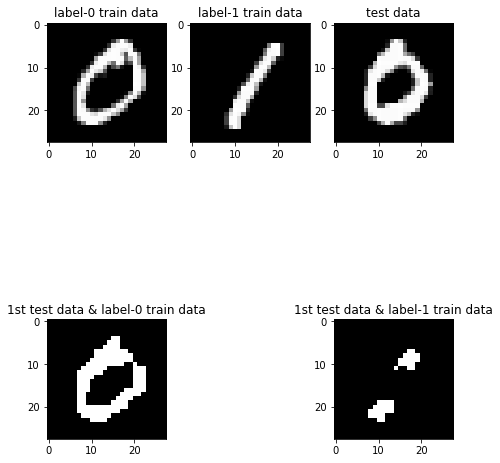

In [117]:
# Label-0 train data get with index
data_0 = x_train[1]
# Label-1 train data get with index
data_1 = x_train[3]
# Test data get with index
test = x_test[3]

# Data preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Test image, ‘0’ image, and also ‘1’ imag do AND operation.
testand0 = np.logical_and(data_0.real, test.real)
testand1 = np.logical_and(data_1.real, test.real)

# Figure size adjustment
plt.figure(figsize = (15, 10))
plt.rc('figure', titlesize=10)

# Show the each Data image
ax = plt.subplot(2,6,1)
plt.imshow(data_0, cmap='gray')
plt.title('label-0 train data')

# Show the each Data image
ax = plt.subplot(2,6,2)
plt.imshow(data_1, cmap='gray')
plt.title('label-1 train data')

# Show the each Data image
ax = plt.subplot(2,6,3)
plt.imshow(test, cmap='gray')
plt.title('test data')

# Show the each Data image
ax = plt.subplot(2,6,7)
plt.imshow(testand0, cmap='gray')
plt.title('1st test data & label-0 train data')

# Show the each Data image
ax = plt.subplot(2,6,9)
plt.imshow(testand1, cmap='gray')
plt.title('1st test data & label-1 train data')

# Count the Number of True 
print('Num of 1s after AND with 0-label train data: %d' %np.count_nonzero(testand0))
print('Num of 1s after AND with 1-label train data: %d' %np.count_nonzero(testand1))
print('0-label yields larger number, thus 1th test image is classfied as 0 digit.')

In [118]:
# Calculate the Accuracy of all '0' and '1' images in test set
acc = 0
total = 0

for i in range(len(x_test)):
    if(y_test[i]== 0 or y_test[i] == 1):  # Test only '0' and '1' images
        
        # Test image, ‘0’ image, and also ‘1’ imag do AND operation.
        t0 = np.logical_and(data_0.real, x_test[i].real)
        t1 = np.logical_and(data_0.real, x_test[i].real)
        acc0 =np.count_nonzero(t0)
        acc1 = np.count_nonzero(t1)
        if(acc0 > acc1):
            total = 0
        if(acc0 < acc1):
            total = 1
        
        # Check the prediction is true or false
        if(total == y_test[i].astype('int64')):
            acc += 1
            
# Calculate the accuracy          
accuracy = (acc/len(x_test))
print("Total Accuracy on Test data is %.4f" %accuracy)

Total Accuracy on Test data is 0.0980
